#### 散列表/哈希表 hash table

* 时间复杂度：O(1)

把Key通过一个固定的算法函数，既所谓的哈希函数转换成一个整型数字，然后就将该数字对数组长度进行取余，取余结果就当作数组的下标，将value存储在以该数字为下标的数组空间里，而当使用哈希表进行查询的时候，就是再次使用哈希函数将key转换为对应的数组下标，并定位到该空间获取value，如此一来，就可以充分利用到数组的定位性能进行数据定位。

#### 哈希冲突

##### 开放定址法  

  * 删除的数据需要标记为deleted，如果直接置成空，在查询数据时，查到空的地址时，会认为key不存在，如果置成deleted，在碰到deleted的情况时，继续寻下一个地址。
  * 根据5、6 的优缺点，当数据量比较小、装载因子小的时候，适合采用开放寻址法。这也是 Java 中的ThreadLocalMap使用开放寻址法解决散列冲突的原因。

1. 线性探查法 
    1. Hi=（H（key）+di）% m   i=1，2，…，n
    2. di=1，2，3，…，m-1
2. 二次探测查法 / 线性补偿探测法
    1. Hi=（H（key）+di）% m   i=1，2，…，n
    2. di=12，-12，22，-22，…，k2，-k2    ( k<=m/2 )
3. 随机探测
    1. di=伪随机数序列。
    2. 应建立一个伪随机数发生器，（如i=(i+p) % m），并给定一个随机数做起点
4. 再hash法
    1. Hi=RH1（key）  i=1，2，…，k
    2. 当哈希地址Hi=RH1（key）发生冲突时，再计算Hi=RH2（key）……，直到冲突不再产生。这种方法不易产生聚集，但增加了计算时间。
5. 优点：开放寻址法不像链表法，需要拉很多链表。散列表中的数据都存储在数组中，可以有效地利用 CPU 缓存加快查询速度。而且，这种方法实现的散列表，序列化起来比较简单。链表法包含指针，序列化起来就没那么容易。
6. 缺点：用开放寻址法解决冲突的散列表，删除数据的时候比较麻烦，需要特殊标记已经删除掉的数据。而且，在开放寻址法中，所有的数据都存储在一个数组中，比起链表法来说，冲突的代价更高。所以，使用开放寻址法解决冲突的散列表，装载因子的上限不能太大。这也导致这种方法比链表法更浪费内存空间

##### 拉链法 Java 中的 LinkedHashMap

* 基于链表的散列冲突处理方法比较适合存储大对象、大数据量的散列表，而且，比起开放寻址法，它更加灵活，支持更多的优化策略，比如用红黑树代替链表。
* 链表法对内存的利用率比开放寻址法要高。因为链表结点可以在需要的时候再创建，并不需要像开放寻址法那样事先申请好
* 链表法比起开放寻址法，对大装载因子的容忍度更高。开放寻址法只能适用装载因子小于 1 的情况。接近 1 时，就可能会有大量的散列冲突，导致大量的探测、再散列等，性能会下降很多。但是对于链表法来说，只要散列函数的值随机均匀，即便装载因子变成 10，也就是链表的长度变长了而已，虽然查找效率有所下降，但是比起顺序查找还是快很多。

1. 将所有关键字为同义词的结点链接在同一个单链表中。若选定的散列表长度为m，则可将散列表定义为一个由m个头指针组成的指针数 组T[0..m-1]。凡是散列地址为i的结点，均插入到以T[i]为头指针的单链表中。T中各分量的初值均应为空指针。在拉链法中，装填因子(load factor)α可以大于 1，但一般均取α≤1。 
2. 散列表的装载因子=填入表中的元素个数/散列表的长度
3. 链表法是一种更加常用的散列冲突解决办法，相比开放寻址法，它要简单很多。在散列表中，每个“桶（bucket）”或者“槽（slot）”会对应一条链表，所有散列值相同的元素都放到相同槽位对应的链表中。
4. 当插入的时候，只需要通过散列函数计算出对应的散列槽位，将其插入到对应链表中即可，所以插入的时间复杂度是 O(1)。
5. 查找和删除的时间复杂度跟链表的长度 k 成正比，也就是 O(k)。对于散列比较均匀的散列函数来说，理论上讲，k=n/m，其中 n 表示散列中数据的个数，m 表示散列表中“槽”的个数。

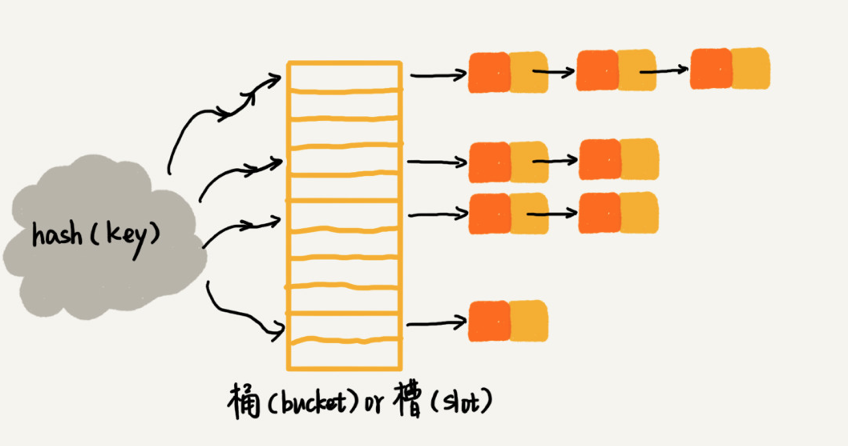

##### 建立公共溢出区
将哈希表分为基本表和溢出表两部分，凡是和基本表发生冲突的元素，一律填入溢出表

#### 设计工业级别的散列表

如何设计一个可以应对各种异常情况的工业级散列表，来避免在散列冲突的情况下，散列表性能的急剧下降，并且能抵抗散列碰撞攻击

在极端情况下，有些恶意的攻击者，还有可能通过精心构造的数据，使得所有的数据经过散列函数之后，都散列到同一个槽里。如果使用的是基于链表的冲突解决方法，那这个时候，散列表就会退化为链表，查询的时间复杂度就从 O(1) 急剧退化为 O(n)。


1. 设计一个合适的散列函数。散列函数生成的值要尽可能随机并且均匀分布
    * 这样才能避免或者最小化散列冲突，而且即便出现冲突，散列到每个槽里的数据也会比较平均，不会出现某个槽内数据特别多的情况。
    * 如何实现 Word 拼写检查功能。这里面的散列函数，可以这样设计：将单词中每个字母的ASCll 码值“进位”相加，然后再跟散列表的大小求余、取模，作为散列值。比如，英文单词 nice，转化出来的散列值就是下面这样：hash("nice")=(("n" - "a") * 26*26*26 + ("i" - "a")*26*26 + ("c" - "a")*26+ ("e"-"a")) / 78978
2. 选择合适的散列冲突解决方法
3. 定义装载因子阈值，并且设计动态扩容策略
    1. 针对数组的扩容，数据搬移操作比较简单。但是，针对散列表的扩容，数据搬移操作要复杂很多。因为散列表的大小变了，数据的存储位置也变了，所以我们需要通过散列函数重新计算每个数据的存储位置。
    2. 为了解决一次性扩容耗时过多的情况，可以将扩容操作穿插在插入操作的过程中，分批完成。
        1. 当装载因子触达阈值之后，只申请新空间，但并不将老的数据搬移到新散列表中。
        2. 当有新数据要插入时，我们将新数据插入新散列表中，并且从老的散列表中拿出一个数据放入到新散列表。
        3. 每次插入一个数据到散列表，都重复上面的过程。经过多次插入操作之后，老的散列表中的数据就一点一点全部搬移到新散列表中了。
        4. 这样没有了集中的一次性数据搬移，插入操作就都变得很快了。
    3. 对于查询操作，为了兼容了新、老散列表中的数据，我们先从新散列表中查找，如果没有找到，再去老的散列表中查找。

redis中的dict.c中的设计思路是用两个hash表来进行进行扩容和转移的工作：当从第一个hash表的loadFactor=1时。
假设要往字典里插入一个元素。
首先新建容量为第一个hash表2倍容量的新表；
同一时候将第一个hash表的一个非空桶中元素所有转移到第二个hash表中。
然后把待插入元素存储到第二个hash表里。
继续往字典里插入第二个元素，又会将第一个hash表的一个非空桶中元素所有转移到第二个hash表中，然后把元素存储到第二个hash表里……直到第一个hash表为空。
这样的策略就把第一个hash表全部元素的转移分摊为多次转移，并且每次转移的期望时间复杂度为O(1)。

Java HashMap
1. 初始大小
    HashMap 默认的初始大小是 16，当然这个默认值是可以设置的，如果事先知道大概的数据量有多大，可以通过修改默认初始大小，减少动态扩容的次数，这样会大大提高 HashMap 的性能。

2. 装载因子和动态扩容
    最大装载因子默认是 0.75，当 HashMap 中元素个数超过 0.75*capacity（capacity 表示哈希表的容量）的时候，就会启动扩容，每次扩容都会扩容为原来的两倍大小。

3. 哈希冲突解决方法
    HashMap 底层采用链表法来解决冲突。
    即使负载因子和哈希函数设计得再合理，也免不了会出现拉链过长的情况，一旦出现拉链过长，则会严重影响 HashMap 的性能。        于是，在 JDK1.8 版本中，为了对 HashMap 做进一步优化，我们引入了红黑树。而当链表长度太长（默认超过 8）时，链表就转换为红黑树。我们可以利用红黑树快速增删改查的特点，提高 HashMap 的性能。当红黑树结点个数少于 8 个的时候，又会将红黑树转化为链表。因为在数据量较小的情况下，红黑树要维护平衡，比起链表来，性能上的优势并不明显。

4. 哈希函数
int hash(Object key) {
    int h = key.hashCode()；
    return (h ^ (h >>> 16)) & (capicity -1); //capicity表示哈希表的大小
}

Java LinkedHashMap

LinkedHashMap 也是通过哈希表和链表组合在一起实现的。实际上，它不仅支持按照插入顺序遍历数据，还支持按照访问顺序来遍历数据。

LinkedHashMap 本身就是一个 *支持 LRU 缓存淘汰策略* 的缓存系统

LinkedHashMap 是通过双向链表和哈希表这两种数据结构组合实现的。LinkedHashMap 中的“Linked”实际上是指的是双向链表，并非指用链表法解决哈希冲突。

~~~
HashMap<Integer, Integer> m = new LinkedHashMap<>();
m.put(3, 11);
m.put(1, 12);
m.put(5, 23);
m.put(2, 22);

for (Map.Entry e : m.entrySet()) {
  System.out.println(e.getKey());
}
~~~

--------------
顺序打印 3，1，5，2

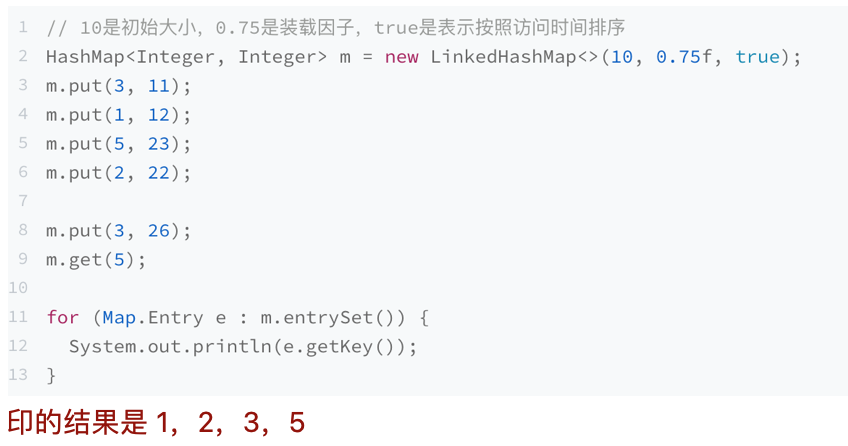

1. 每次调用 put() 函数，往 LinkedHashMap 中添加数据的时候，都会将数据添加到链表的尾部，所以，在前四个操作完成之后，链表中的数据是下面这样：
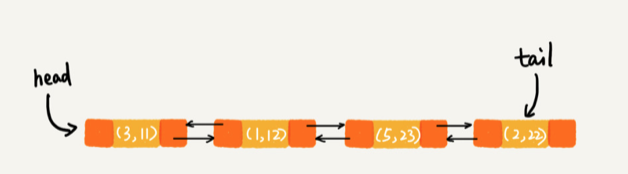

2. 在第 8 行代码中，再次将键值为 3 的数据放入到 LinkedHashMap 的时候，会先查找这个键值是否已经有了，然后，再将已经存在的 (3,11) 删除，并且将新的 (3,26) 放到链表的尾部。所以，这个时候链表中的数据就是下面这样：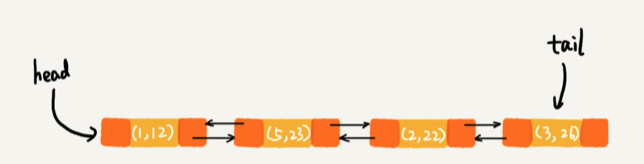

3. 当第 9 行代码访问到 key 为 5 的数据的时候，我们将被访问到的数据移动到链表的尾部。所以，第 9 行代码之后，链表中的数据是下面这样：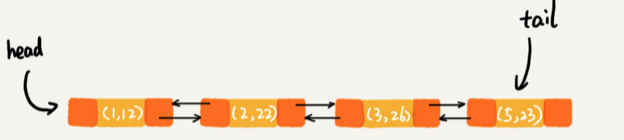

今天讲的几个哈希表和链表结合使用的例子里，我们用的都是双向链表。如果把双向链表改成单链表，还能否正常工作呢？为什么呢？

可以。
增：都需要顺序查询，时间复杂度一致
删：单链表需要保存前继结点(不需要保存前继节点，适用于非尾节点：node.val = node.next.val; node.next = node.next.next)
查：都需要顺序查询，时间复杂度一致

为什么哈希表和链表经常一块使用？

1. 哈希表这种数据结构虽然支持非常高效的数据插入、删除、查找操作，但是哈希表中的数据都是通过哈希函数打乱之后无规律存储的。也就说，它无法支持按照某种顺序快速地遍历数据。如果希望按照顺序遍历哈希表中的数据，那我们需要将哈希表中的数据拷贝到数组中，然后排序，再遍历。
2. 因为哈希表是动态数据结构，不停地有数据的插入、删除，所以每当我们希望按顺序遍历哈希表中的数据的时候，都需要先排序，那效率势必会很低。为了解决这个问题，我们将哈希表和链表（或者跳表）结合在一起使用。

Redis zset
hash table + skipped list+ ？

假设猎聘网有 10 万名猎头，每个猎头都可以通过做任务（比如发布职位）来积累积分，然后通过积分来下载简历。假设你是猎聘网的一名工程师，如何在内存中存储这 10 万个猎头 ID 和积分信息，让它能够支持这样几个操作：
1. 根据猎头的 ID 快速查找、删除、更新这个猎头的积分信息；
2. 查找积分在某个区间的猎头 ID 列表；
3. 查找按照积分从小到大排名在第 x 位到第 y 位之间的猎头 ID 列表。


根据id快速查找: hash table; 排序+区间->redis的zset:跳表
存储数据结构为 猎头id为key的hash table + 以积分升序排序的跳表，存储数据为猎头信息（id、积分等）
1. 查询：hash查询后，定位到具体的节点；删除：查询后删除跳表的节点和hash的key;更新：查询后删除跳表的节点，重新往跳表中加入新积分的节点；
2. 根据跳表查询积分区间，返回区间间的节点id；
3. 顺序查找跳表的原始链表，返回x到y之间的猎头id



有两个字符串数组，每个数组大约有 10 万条字符串，如何快速找出两个数组中相同的字符串？

以第一个字符串数组构建散列表，key 为字符串，value 为出现次数。再遍历第二个字符串数组，以字符串为 key 在散列表中查找，如果 value 大于零，说明存在相同字符串。时间复杂度 O(N)。

In [ ]:
'''
242. Valid Anagram Easy

Given two strings s and t, return true if t is an anagram of s, and false otherwise.

An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.


Example 1:

Input: s = "anagram", t = "nagaram"
Output: true
Example 2:

Input: s = "rat", t = "car"
Output: false
'''

class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        # return sorted(s) == sorted(t) # nlog(n)

        sMap, tMap = {}, {}
        
        for v in s:
            sMap[v] = sMap.get(v, 0) + 1
        for v in t:
            tMap[v] = tMap.get(v, 0) + 1
        
        return sMap == tMap

        

In [ ]:
'''
1. Two Sum Easy

Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

 

Example 1:

Input: nums = [2,7,11,15], target = 9
Output: [0,1]
Explanation: Because nums[0] + nums[1] == 9, we return [0, 1].
Example 2:

Input: nums = [3,2,4], target = 6
Output: [1,2]
'''

class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        numMap = {}
        n = len(nums)

        for i in range(n):
            complement = target - nums[i]
            if complement in numMap:
                return [numMap[complement], i]
            numMap[nums[i]] = i

        return []  # No solution found  

In [ ]:
'''
15. 3Sum Medium

Given an integer array nums, return all the triplets [nums[i], nums[j], nums[k]] such that i != j, i != k, and j != k, and nums[i] + nums[j] + nums[k] == 0.

Notice that the solution set must not contain duplicate triplets.

 

Example 1:

Input: nums = [-1,0,1,2,-1,-4]
Output: [[-1,-1,2],[-1,0,1]]
Explanation: 
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.
The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.
Example 2:

Input: nums = [0,1,1]
Output: []
Explanation: The only possible triplet does not sum up to 0.

'''

class Solution:

    def threeSum(self, nums: List[int]) -> List[List[int]]:
        negList, posList = [], []
        zeros = 0
        for v in nums:
            if v > 0:
                posList.append(v)
            elif v < 0:
                negList.append(v)
            else:
                zeros += 1

        negSet = set(negList)
        posSet = set(posList)

        valid_value = set()
        
        if zeros:
            if zeros >= 3:
                valid_value.add((0,0,0))

            for p in posSet:
                if -p in negSet:
                    valid_value.add((-p, 0, p))
            

        
        for i in range(0, len(posList)):
            for j in range(i+1, len(posList)):
                lost = 0 - posList[i] - posList[j]
                if lost in negSet:
                    valid_value.add(tuple(sorted([posList[i], posList[j], lost])))

        for i in range(0, len(negList)):
            for j in range(i+1, len(negList)):
                lost = -1*(negList[i] + negList[j])
                if lost in posSet:
                    valid_value.add(tuple(sorted([negList[i], negList[j], lost])))

        
        return valid_value



        